# 화합물 분류

- 문제 : 주어진 화합물 샘플을 활성 화합물의 확률을 예측하는 분류기 구현하기
- 접근방식 : 비정형 데이터 분석 (구조화되지 않은 텍스트로 예측)
- 제출일자 : 22년 7월 26일 - 22년 8월 2일

### 관련 단어 정리
Compound = 화합물

In [1]:
import pandas as pd
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem

### rdkit
화학물질의 정보를 담고 있는 데이터를 이용해서 화학물질의 구조식을 만들어내는 툴
- cheminfomatics toolkit

In [2]:
df = pd.read_csv('cmpd.csv')

In [3]:
df

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active
...,...,...,...,...
5525,UBAHPEHGSJRHGA-UHFFFAOYSA-N,Cc1cccc2nc(-c3ccc(-c4cccc(CN5CCC(C(N)=O)CC5)c4...,test,inactive
5526,RTTIKBHDHKOSNI-UHFFFAOYSA-N,Cc1c2ccccc2nc2c1c1cc(NCCN(C)C)ccc1n2CCN(C)C,test,inactive
5527,HVUOSZANYULBJR-UHFFFAOYSA-N,Cc1ccc(-c2ccn(-c3ccc4c5c(n(C)c4c3)CCCNC5)c(=O)...,test,inactive
5528,SNFWCJIVWUVRNO-UHFFFAOYSA-N,N#Cc1c(-c2ccccc2C(F)(F)F)nc(SCc2ccc(OC(F)(F)F)...,test,inactive


In [4]:
train = df[df['group'] == 'train']
test = df[df['group'] == 'test']

In [5]:
train.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
5,IFPPYSWJNWHOLQ-UHFFFAOYSA-N,CCN(CC)CCOc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O...,train,active
7,WOSKHXYHFSIKNG-UHFFFAOYSA-N,COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C...,train,active


In [6]:
test.head()

,inchikey,smiles,group,activity
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active
6,JMGXJHWTVBGOKG-UHFFFAOYSA-N,Cc1cc(-c2cc(OC(=O)c3ccccc3)ccc2Cl)cc2nnc(Nc3cc...,test,active
10,DXCUKNQANPLTEJ-UHFFFAOYSA-N,CCN(CC)CCCCNc1ncc2cc(-c3cc(OC)cc(OC)c3)c(NC(=O...,test,active
11,PIQCTGMSNWUMAF-UHFFFAOYSA-N,CN1CCN(c2ccc3nc(-c4c(N)c5c(F)cccc5[nH]c4=O)[nH...,test,active


### 관련 사이트 정리

- [InCHI Trust](https://www.inchi-trust.org/downloads/)
- [라인 표기법](https://chem.libretexts.org/Courses/Fordham_University/Chem1102%3A_Drug_Discovery_-_From_the_Laboratory_to_the_Clinic/05%3A_Organic_Molecules/5.08%3A_Line_Notation_(SMILES_and_InChI))
- [InCHI key 정리 및 convert](http://inchi.info/inchikey_overview_en.html)
- [smiles translator](https://www2.chemie.uni-erlangen.de/services/translate/)


### 관련 단어 정리

InChIkey = (IUPAC Chemical Identifier key), InCHI의 해시 버젼
> ex) TTZSNFLLYPYKIL-UHFFFAOYSA-N	
    > 1. TTZSNFLLYPYKIL = main layer, 주층
    > 2. UHFFFAOY = stereochemistry & isotopes, 입체화학 및 동위원소
    > 3. SA = Version, 버젼
    > 4. N = Protons, 양자


SMILES = (Simplified Molecular-Input Line-Entry System), ASCII 문자열을 사용한 화확 구조 설명 줄 표기법
> ex) C1CCCCC1  =	Cyclohexane (C6H12)

group = 학습 데이터, 테스트 데이터

activity = 활성상태

In [11]:
# smiles 코드를 읽어서 분자 구조를 그리기
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToImage
from rdkit.Chem.Draw import MolToFile

for i in df['smiles']:
    print(i)

CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1
CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc34)ccc12
Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4)n3)ccc2[nH]1
COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2
Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O
CCN(CC)CCOc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n2)cc1
Cc1cc(-c2cc(OC(=O)c3ccccc3)ccc2Cl)cc2nnc(Nc3ccc(OCCN4CCCC4)cc3)nc12
COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O
COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)nc3c2)c1
CCN1CCC(Nc2ccc3c(c2)C(=C(c2cccc(F)c2)c2nc(C)c[nH]2)C(=O)N3)CC1
CCN(CC)CCCCNc1ncc2cc(-c3cc(OC)cc(OC)c3)c(NC(=O)NC(C)(C)C)nc2n1
CN1CCN(c2ccc3nc(-c4c(N)c5c(F)cccc5[nH]c4=O)[nH]c3c2)CC1
COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2cc1OCCNCCO
Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)O)c(C)c34)ccc2[nH]1
COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O)CN2CCN(C)CC2)cc1)c1ccccc1
Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12
CN(C[C@@H]1COCCO1)S(=O)(=O)Nc1ccc2ccc3ncc(-c4cnn(C)c4)cc3

In [12]:
mol = Chem.MolFromSmiles(df['smiles'][0])

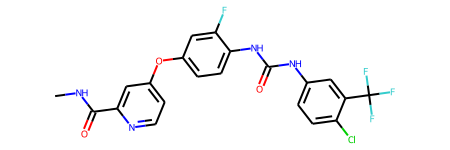

In [13]:
mol

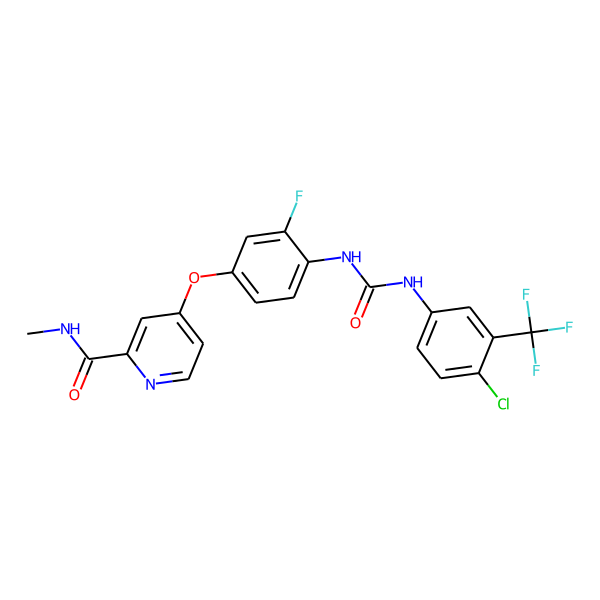

In [14]:
MolsToImage(mols=[mol], subImgSize=(600, 600))

In [17]:
df['activity'].value_counts()

active          2704
inactive        1886
unknown          599
intermediate     341
Name: activity, dtype: int64

In [19]:
df['smiles'].value_counts()

CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc34)ccc12                          3
COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O                             3
CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1                    2
Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)O)c(C)c34)ccc2[nH]1                           2
CN1CCN(CC1)Cc2ccc(NC(=O)c3ccc(C)c(c3)C#Cc4cnc5cccnn45)cc2C(F)(F)F               2
                                                                               ..
Nc1ncc(-c2cccc(S(N)(=O)=O)c2)c2scc(-c3ccc(F)c(Cl)c3)c12                         1
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCCN1CCOCC1                                    1
Cc1cc(C(=O)Nc2cc(Oc3ccc4nc(NC(=O)C5CC5)nn4c3)ccc2F)n(C)n1                       1
CNC(=O)CN1CCC(Oc2cc3c(Nc4cccc(Cl)c4F)ncnc3cc2OC)CC1                             1
CCOP(=O)(OCC)[C@@H]1C[C@H](C(=O)Nc2cc3c4c(cccc4c2)C(=O)N(CCN2CCCC2)C3=O)ON1C    1
Name: smiles, Length: 5507, dtype: int64